In [1]:
import distl
import astropy.units as u

# Example 1: Gaussian with Custom `wrap_at`

Let's create a [Gaussian distribution](../api/Gaussian.md) centered around 10, and tell `distl` to wrap the distribution at 12.  Whenever we call sample, values that extend beyone 10 will be wrapped onto the range `[0-10]`.

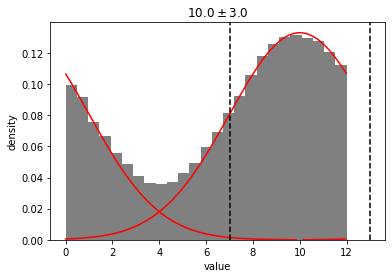

In [2]:
g = distl.gaussian(10, 3, wrap_at=12)
out = g.plot(show=True)

To _temporarily_ disable wrapping, just pass `wrap_at=False` to [sample](../api/Gaussian.sample.md) or [plot](../api/Gaussian.plot.md).

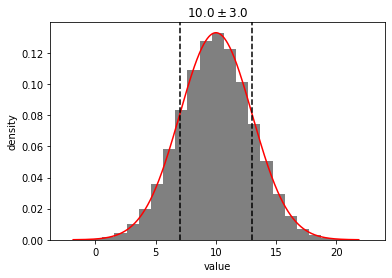

In [3]:
out = g.plot(show=True, wrap_at=False)

To _temporarily_ use a different value for wrapping, pass that value to `wrap` in [sample](../api/Gaussian.sample.md) or [plot](../api/Gaussian.plot.md)

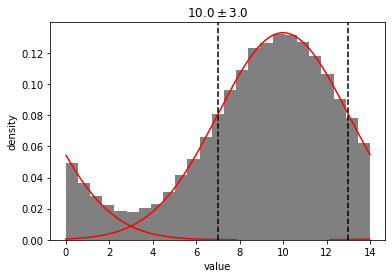

In [4]:
out = g.plot(show=True, wrap_at=14)

If we convert this [Gaussian distribution](../api/Gaussian.md) to a [Histogram](../api/Histogram.md), the wrapping will be maintained.  But note that the underlying distribution bins will be unwrapped, meaning that we can still fit a guassian pre-wrapping.

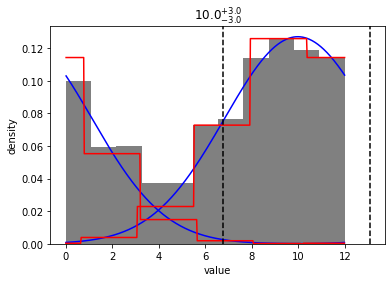

In [5]:
gh = g.to_histogram()
out = gh.plot(show=True, plot_gaussian=True)

# Example 2: Automatic Wrapping for Distributions with Angle Units

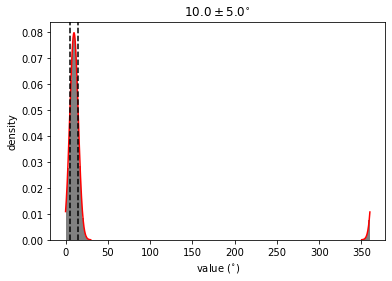

In [6]:
i = distl.gaussian(10, 5)*u.deg
out = i.plot(show=True, bins=200)

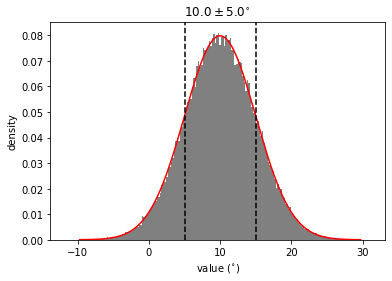

In [7]:
out = i.plot(show=True, wrap_at=False, bins=200)

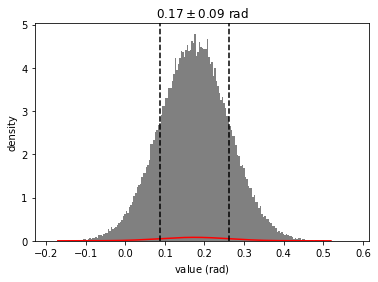

In [8]:
out = i.plot(show=True, bins=200, wrap_at=False, unit=u.rad)
# NOTE: plot_pdf normalization does not always handle unit-conversion correctly
# but this should only affect plotting

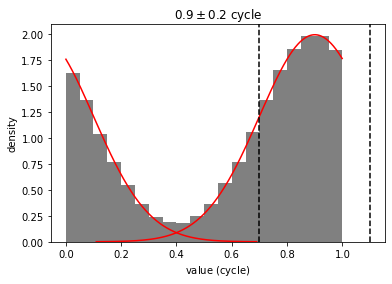

In [9]:
p = distl.gaussian(0.9, 0.2)*u.cycle
out = p.plot(show=True, bins=20)

# Example 3: Uniform Distribution with `low` > `high`

**NOTE**: this is currently broken, but will hopefully be fixed before the first official release

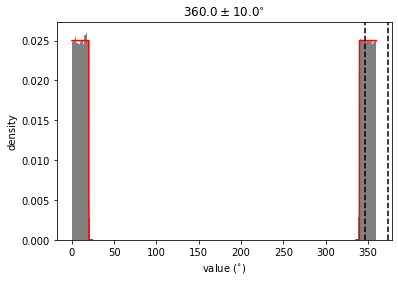

In [10]:
b = distl.uniform(340, 20, unit=u.deg)
out = b.plot(show=True, bins=200)

Note that `low > high` is only permitted if `wrap_at` is provided (or defaulted based on angular units).  In this case, the passed value of low is automatically altered to `low + wrap_at`.

For example:

In [11]:
print(b.get_wrap_at())

360


In [12]:
print(b.low, b.high)

340.0 380.0


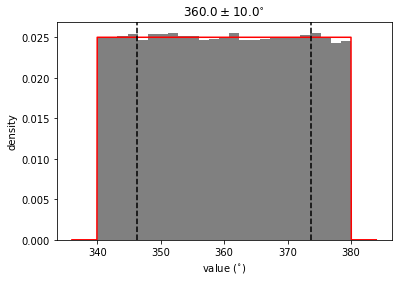

In [13]:
out = b.plot(show=True, wrap_at=False)